#Campus Placement Prediction


## Machine Learning Model Building Steps

#### Data Preprocessing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/campus_placement.csv")

In [ ]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [ ]:
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
categorical_columns= df.select_dtypes(include=['object']).columns.to_list()

In [ ]:
categorical_columns

['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

In [ ]:
from  sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder ={col:LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
  df[col]=label_encoder[col].fit_transform(df[col])

In [ ]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [ ]:
df.corr()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,1.000000,0.005724,0.015655,0.015924,0.011872,0.020314,-0.002269,0.013683,0.026297,-0.003082,0.024115,0.004294
CGPA,0.005724,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.444130,0.251628,0.404971,0.462313,0.423131
Internships,0.015655,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.274960,0.153547,0.279837,0.317149,0.260340
Projects,0.015924,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.491430,0.293709,0.499421,0.535708,0.475186
Workshops/Certifications,0.011872,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373926,0.180333,0.373045,0.418442,0.362268
AptitudeTestScore,0.020314,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.474130,0.314772,0.513044,0.565105,0.521744
SoftSkillsRating,-0.002269,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.448049,0.235571,0.430734,0.466912,0.427284
ExtracurricularActivities,0.013683,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,1.000000,0.327158,0.517850,0.533572,0.482491
PlacementTraining,0.026297,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.327158,1.000000,0.257440,0.325434,0.323659
SSC_Marks,-0.003082,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,0.517850,0.257440,1.000000,0.524916,0.469763


<Axes: >

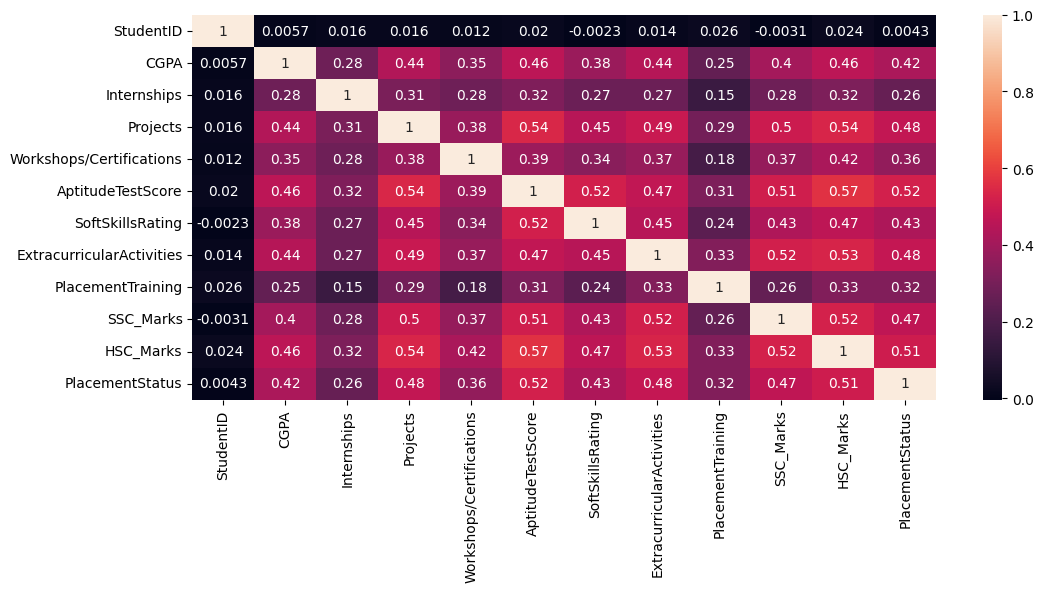

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot = True)

### feature selection

In [ ]:
X = df.drop(columns =['PlacementStatus']) # hear i am already drop the studentid, so i cant apply hear
y = df['PlacementStatus']

In [ ]:
X.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,1,7.5,1,1,1,65,4.4,0,0,61,79
1,2,8.9,0,3,2,90,4.0,1,1,78,82
2,3,7.3,1,2,2,82,4.8,1,0,79,80
3,4,7.5,1,1,2,85,4.4,1,1,81,80
4,5,8.3,1,2,2,86,4.5,1,1,74,88


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state= 67)

In [ ]:
numerical_columns = df.select_dtypes(include=['int64',float]).columns.to_list()

#### feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df[numerical_columns] = scalar.fit_transform(df[numerical_columns]).round(2)

In [ ]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,-1.73,-0.31,-0.07,-1.18,-0.01,-1.77,0.18,-1.19,-1.65,-0.78,0.50,-0.85
1,-1.73,1.88,-1.58,1.12,1.09,1.29,-0.79,0.84,0.61,0.85,0.84,1.18
2,-1.73,-0.62,-0.07,-0.03,1.09,0.31,1.16,0.84,-1.65,0.94,0.62,-0.85
3,-1.73,-0.31,-0.07,-1.18,1.09,0.68,0.18,0.84,0.61,1.14,0.62,1.18
4,-1.73,0.94,-0.07,-0.03,1.09,0.80,0.43,0.84,0.61,0.46,1.51,1.18


## Logistic Regression - Model Building and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(max_iter=400)
classifier.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400)

In [ ]:
y_prde = classifier.predict(x_test)
print("max iter: 100")

max iter: 100


#### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy =',accuracy_score(y_test,y_prde))

Accuracy = 0.7655


### Decision Tree Model Building and Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7875


In [ ]:
import matplotlib.pyplot as plt

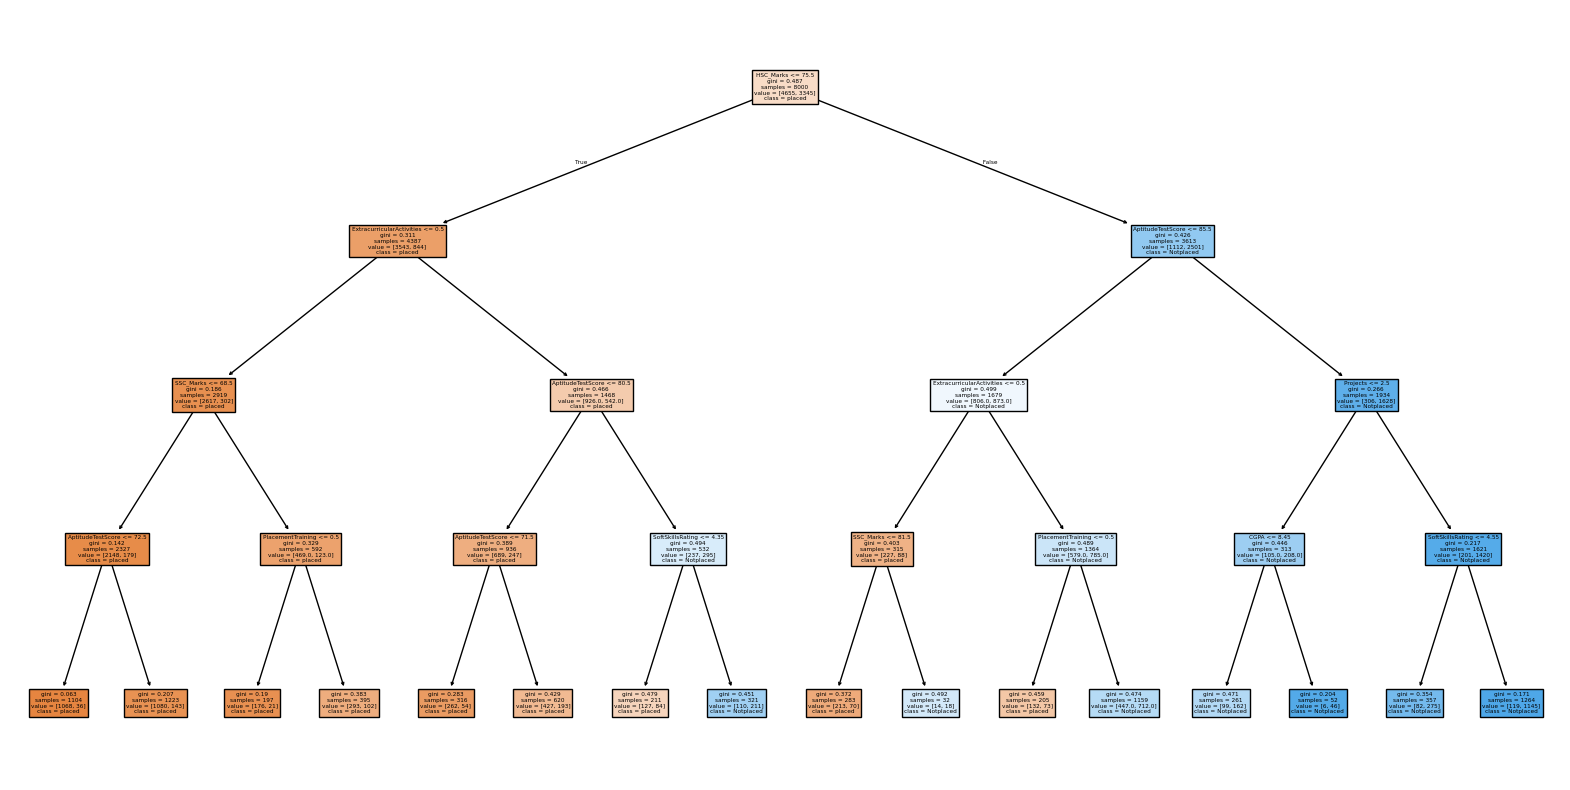

In [ ]:
plt.figure(figsize = (20,10))
plot_tree(clf,feature_names= X.columns,class_names = ['placed','Notplaced'],filled = True)
plt.show()

### K-Nearest Neighbors KNN - Model Building and Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clff = KNeighborsClassifier(n_neighbors = 4)
clff.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = clff.predict(x_test)

In [ ]:
clf.score(x_test,y_test)

0.7875

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

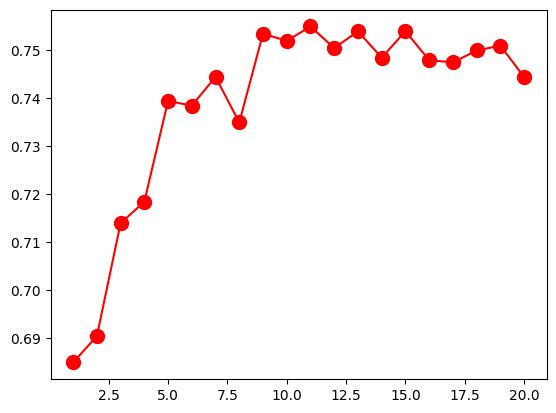

In [ ]:
accuracy_scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
plt.plot(k_values, accuracy_scores, marker='o',color = 'red',markersize = 10)
plt.show()


### Comparison and Analysis

Compare the accuracy scores of the three models

Logistic Regression=0.76
Decision Tree Classifier=0.78
K-Nearest Neighbors (KNN)=0.78

Discuss which model performed best and why, based on the accuracy scores and other relevant factors.

 K-Nearest Neighbors (KNN)=0.78


Reflect on the strengths and weaknesses of each model in the context of this dataset

Logistic Regression
Based on the linear relationships
may not suit complex relationships.

Decision Tree Classifier
captures complex patterns and is easy to interpret visually
prone to overfitting

K-Nearest Neighbors (KNN)
Flexible and effective at capturing local patterns in the data
feature scaling and outliers.